In [2]:
import pandas as pd
import numpy as np

# XGB MODEL

In [4]:
df5=pd.read_csv("cleaner_data.csv")

In [6]:
from sklearn.model_selection import train_test_split
X = df5.drop(columns=['bad_flag'])
y = df5['bad_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(
    random_state=42,
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]
precision, recall, f1, _ = precision_recall_fscore_support(y_test, xgb_pred, average='binary')
roc_auc = roc_auc_score(y_test, xgb_proba)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [8]:
importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
top_100 = importances.sort_values(ascending=False).head(100).index.tolist()
X_train_top100 = X_train[top_100]
print(X_train_top100)

       transaction_attribute_134  transaction_attribute_431  onus_attribute_2  \
93417                        NaN                        NaN          0.016955   
53211                        NaN                        NaN         -0.000717   
61019                        NaN                        NaN         -0.000003   
29842                        0.0                        0.0          0.000000   
79069                        NaN                        NaN          0.000000   
...                          ...                        ...               ...   
24748                        0.0                        0.0          0.241640   
50687                        NaN                        NaN         -0.000907   
58659                        0.0                        0.0          0.999642   
14508                        NaN                        NaN         -0.000072   
65327                        0.0                        0.0          0.699538   

       bureau_278  bureau_4

In [9]:
print(top_100)

['transaction_attribute_134', 'transaction_attribute_431', 'onus_attribute_2', 'bureau_278', 'bureau_452', 'transaction_attribute_426', 'bureau_426', 'transaction_attribute_465', 'transaction_attribute_464', 'transaction_attribute_429', 'transaction_attribute_530', 'transaction_attribute_619', 'transaction_attribute_284', 'bureau_318', 'transaction_attribute_601', 'transaction_attribute_189', 'bureau_enquiry_11', 'transaction_attribute_563', 'onus_attribute_17', 'transaction_attribute_430', 'transaction_attribute_609', 'transaction_attribute_302', 'transaction_attribute_167', 'transaction_attribute_206', 'transaction_attribute_334', 'transaction_attribute_424', 'transaction_attribute_570', 'bureau_357', 'transaction_attribute_441', 'transaction_attribute_283', 'transaction_attribute_279', 'bureau_enquiry_35', 'bureau_enquiry_25', 'transaction_attribute_214', 'bureau_439', 'transaction_attribute_301', 'transaction_attribute_500', 'onus_attribute_9', 'transaction_attribute_186', 'bureau_

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred),roc_auc)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19088
           1       0.09      0.22      0.13       274

    accuracy                           0.96     19362
   macro avg       0.54      0.59      0.56     19362
weighted avg       0.98      0.96      0.97     19362
 0.7936919897700089


In [11]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.5 MB/s eta 0:00:00


stage 1-

[I 2025-07-06 13:39:11,351] A new study created in memory with name: no-name-370c32a8-d5ae-4e9e-8400-adb8b37568ec


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-07-06 13:39:45,772] Trial 0 finished with value: 0.19343065693430658 and parameters: {'n_estimators': 396, 'learning_rate': 0.1659038072792787, 'max_depth': 4, 'min_child_weight': 3.3343473627577445, 'subsample': 0.6060576093994189, 'colsample_bytree': 0.6488337580273664, 'gamma': 1.9901913556608068, 'lambda': 4.474185158713133, 'alpha': 3.78130581125754}. Best is trial 0 with value: 0.19343065693430658.
[I 2025-07-06 13:40:17,040] Trial 1 finished with value: 0.5072992700729927 and parameters: {'n_estimators': 400, 'learning_rate': 0.030757930008957053, 'max_depth': 5, 'min_child_weight': 9.919744262882443, 'subsample': 0.6911199684807872, 'colsample_bytree': 0.987866567787093, 'gamma': 3.385205251814803, 'lambda': 1.5797213201882383, 'alpha': 0.7297597495417246}. Best is trial 1 with value: 0.5072992700729927.
[I 2025-07-06 13:40:41,254] Trial 2 finished with value: 0.7591240875912408 and parameters: {'n_estimators': 399, 'learning_rate': 0.018498378208115444, 'max_depth': 3,

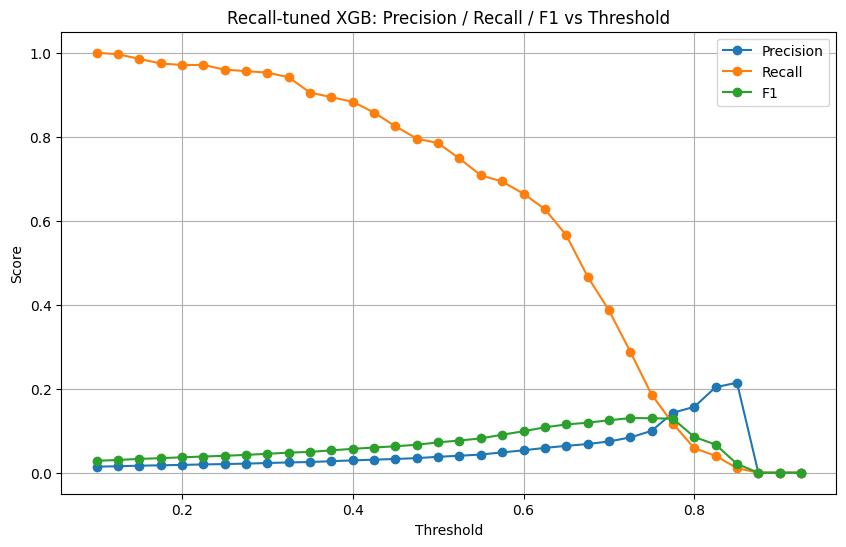

    Threshold  Precision    Recall        F1
0       0.100   0.014426  1.000000  0.028441
1       0.125   0.015392  0.996350  0.030316
2       0.150   0.016744  0.985401  0.032929
3       0.175   0.017648  0.974453  0.034669
4       0.200   0.018684  0.970803  0.036662
5       0.225   0.019701  0.970803  0.038618
6       0.250   0.020592  0.959854  0.040319
7       0.275   0.021698  0.956204  0.042433
8       0.300   0.023081  0.952555  0.045070
9       0.325   0.024536  0.941606  0.047826
10      0.350   0.025462  0.905109  0.049531
11      0.375   0.027466  0.894161  0.053296
12      0.400   0.029365  0.883212  0.056841
13      0.425   0.031097  0.857664  0.060018
14      0.450   0.032749  0.824818  0.062997
15      0.475   0.034741  0.795620  0.066575
16      0.500   0.037892  0.784672  0.072293
17      0.525   0.040410  0.748175  0.076679
18      0.550   0.043352  0.708029  0.081701
19      0.575   0.048408  0.693431  0.090498
20      0.600   0.053310  0.664234  0.098698
21      0.

In [13]:
# Retune Optuna — for Recall-focused model (credit risk)

import pandas as pd, numpy as np, warnings, time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, recall_score, average_precision_score
from xgboost import XGBClassifier
import optuna
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Prepare data
X_full = df5[top_100]  # Use only top 100 features
y_full = df5['bad_flag']

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X_full, y_full, stratify=y_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.25, random_state=42)

# Class weight
pos_weight = (y_train==0).sum() / max((y_train==1).sum(),1)

# Optuna objective — recall-based!
def objective(trial):
    params = {
        'random_state':42,
        'n_estimators': trial.suggest_int('n_estimators',200,400),
        'learning_rate': trial.suggest_float('learning_rate',0.01,0.2,log=True),
        'max_depth': trial.suggest_int('max_depth',3,6),
        'min_child_weight': trial.suggest_float('min_child_weight',1,10),
        'subsample': trial.suggest_float('subsample',0.6,1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.6,1.0),
        'gamma': trial.suggest_float('gamma',0,5),
        'lambda': trial.suggest_float('lambda',0,5),
        'alpha': trial.suggest_float('alpha',0,5),
        'scale_pos_weight': pos_weight,
        'n_jobs': -1,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    preds = model.predict_proba(X_val)[:,1]

    # FIXED THRESHOLD = 0.5 — compute recall at 0.5
    recall = recall_score(y_val, (preds >= 0.5).astype(int))

    return recall  # THIS is new — tune for recall!

# Run Optuna — for 30 trials
study = optuna.create_study(direction='maximize')
start = time.time()
study.optimize(objective, n_trials=30, show_progress_bar=True)
print('Tuning finished in', round(time.time() - start, 1), 'seconds')

# Best params
best_params = study.best_params
best_params.update({
    'random_state':42,
    'scale_pos_weight': pos_weight,
    'n_jobs': -1,
    'eval_metric': 'logloss'
})

# Final model — retrain full train+val
final_model = XGBClassifier(**best_params)
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]), verbose=False)

# Predict on test set
proba_test = final_model.predict_proba(X_test)[:,1]
pr_auc_test = average_precision_score(y_test, proba_test)
print(f'PR-AUC: {pr_auc_test:.4f}')

# Threshold tuning for plot
thresholds = np.arange(0.1, 0.95, 0.025)
rows = []
for t in thresholds:
    preds = (proba_test >= t).astype(int)
    p, r, f, _ = precision_recall_fscore_support(y_test, preds, average='binary', zero_division=0)
    rows.append([t, p, r, f])

metrics_df = pd.DataFrame(rows, columns=['Threshold', 'Precision', 'Recall', 'F1'])

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], label='F1', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall-tuned XGB: Precision / Recall / F1 vs Threshold')
plt.grid()
plt.legend()
plt.show()

# Also print the table
print(metrics_df)


stage 2-

In [50]:
proba_test_stage1 = final_model.predict_proba(X_test)[:, 1]

# Define your threshold values again
threshold_stage1_low = 0.325
threshold_stage1_high = 0.8

# Create masks based on threshold values
test_mask_borderline = (proba_test_stage1 >= threshold_stage1_low) & (proba_test_stage1 < threshold_stage1_high)
test_mask_obvious = (proba_test_stage1 >= threshold_stage1_high)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

# Prepare stage 2 data
X_stage2 = X_test[test_mask_borderline].copy()
y_stage2 = y_test[test_mask_borderline]
X_stage2['stage1_proba'] = proba_test[test_mask_borderline]

# Handle missing
from sklearn.impute import SimpleImputer
X_stage2_imputed = SimpleImputer().fit_transform(X_stage2)

# Train calibrated model (logistic calibration over gradient boosting)
base_model = GradientBoostingClassifier()
calibrated_model = CalibratedClassifierCV(base_model, method='isotonic', cv=3)
calibrated_model.fit(X_stage2_imputed, y_stage2)


CalibratedClassifierCV(cv=3, estimator=GradientBoostingClassifier(),
                       method='isotonic')

In [52]:
# Predict calibrated fraud score
risk_score = calibrated_model.predict_proba(X_stage2_imputed)[:, 1]

# Sort predictions by risk score
top_indices = np.argsort(risk_score)[::-1]  # highest first

# Let's say you only want top N as frauds
N = int(len(risk_score) * 0.3)  # You want top 30% of borderline flagged as final fraud
final_stage2_preds = np.zeros_like(risk_score)
final_stage2_preds[top_indices[:N]] = 1


In [53]:
final_preds = np.zeros_like(y_test)
final_preds[test_mask_obvious] = 1
final_preds[test_mask_borderline] = final_stage2_preds


In [55]:
print("\n🎯 Final Two-Stage Evaluation:")
print("Precision:", precision_score(y_test, final_preds))
print("Recall:   ", recall_score(y_test, final_preds))
print("F1 Score: ", f1_score(y_test, final_preds))

# Detailed breakdown
print("\nClassification Report:")
print(classification_report(y_test, final_preds, zero_division=0))


🎯 Final Two-Stage Evaluation:
Precision: 0.07813953488372093
Recall:    0.9197080291970803
F1 Score:  0.14404115461560446

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     19088
           1       0.08      0.92      0.14       274

    accuracy                           0.85     19362
   macro avg       0.54      0.88      0.53     19362
weighted avg       0.99      0.85      0.90     19362

